# Cullinan Pincell Practice
Code from OpenMC examples/modeling a pin-cell

In [48]:
%matplotlib inline
import openmc

## Define Materials

In [49]:
uo2 = openmc.Material(1,'uo2')
print(uo2)

Material
	ID             =	1
	Name           =	uo2
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       



/home/karlflorida/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)


In [50]:
mat = openmc.Material()
print(mat)

Material
	ID             =	8
	Name           =	
	Temperature    =	None
	Density        =	None [sum]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       



In [51]:
help(uo2.add_nuclide)

Help on method add_nuclide in module openmc.material:

add_nuclide(nuclide: str, percent: float, percent_type: str = 'ao') method of openmc.material.Material instance
    Add a nuclide to the material
    
    Parameters
    ----------
    nuclide : str
        Nuclide to add, e.g., 'Mo95'
    percent : float
        Atom or weight percent
    percent_type : {'ao', 'wo'}
        'ao' for atom percent and 'wo' for weight percent



In [52]:
# add nuclides to uo2
uo2.add_nuclide('U235', 0.03)
uo2.add_nuclide('U238', 0.97)
uo2.add_nuclide('O16', 2.0)

In [53]:
uo2.set_density('g/cm3', 10.0)

In [54]:
zirconium = openmc.Material(name='zirconium')
zirconium.add_element('Zr', 1.0)
zirconium.set_density('g/cm3', 6.6)

water = openmc.Material(name='h2o')
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)
water.set_density('g/cm3', 1.0)

In [55]:
water.add_s_alpha_beta('c_H_in_H2O')

In [56]:
materials = openmc.Materials([uo2, zirconium, water])

In [57]:
materials = openmc.Materials()
materials.append(uo2)
materials += [zirconium, water]
isinstance(materials,list)

True

### Export Materials as XML

In [58]:
materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1" name="uo2">
    <density units="g/cm3" value="10.0" />
    <nuclide ao="0.03" name="U235" />
    <nuclide ao="0.97" name="U238" />
    <nuclide ao="2.0" name="O16" />
  </material>
  <material id="9" name="zirconium">
    <density units="g/cm3" value="6.6" />
    <nuclide ao="0.5145" name="Zr90" />
    <nuclide ao="0.1122" name="Zr91" />
    <nuclide ao="0.1715" name="Zr92" />
    <nuclide ao="0.1738" name="Zr94" />
    <nuclide ao="0.028" name="Zr96" />
  </material>
  <material id="10" name="h2o">
    <density units="g/cm3" value="1.0" />
    <nuclide ao="2.0" name="H1" />
    <nuclide ao="1.0" name="O16" />
    <sab name="c_H_in_H2O" />
  </material>
</materials>


In [59]:
water.remove_nuclide('O16')
water.add_element('O', 1.0)

materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1" name="uo2">
    <density units="g/cm3" value="10.0" />
    <nuclide ao="0.03" name="U235" />
    <nuclide ao="0.97" name="U238" />
    <nuclide ao="2.0" name="O16" />
  </material>
  <material id="9" name="zirconium">
    <density units="g/cm3" value="6.6" />
    <nuclide ao="0.5145" name="Zr90" />
    <nuclide ao="0.1122" name="Zr91" />
    <nuclide ao="0.1715" name="Zr92" />
    <nuclide ao="0.1738" name="Zr94" />
    <nuclide ao="0.028" name="Zr96" />
  </material>
  <material id="10" name="h2o">
    <density units="g/cm3" value="1.0" />
    <nuclide ao="2.0" name="H1" />
    <nuclide ao="0.999621" name="O16" />
    <nuclide ao="0.000379" name="O17" />
    <sab name="c_H_in_H2O" />
  </material>
</materials>


## Cross Sections

In [60]:
!cat $OPENMC_CROSS_SECTIONS | head -n 10
print('    ...')
!cat $OPENMC_CROSS_SECTIONS | tail -n 10

<?xml version='1.0' encoding='utf-8'?>
<cross_sections>
  <library materials="H1" path="neutron/H1.h5" type="neutron" />
  <library materials="H2" path="neutron/H2.h5" type="neutron" />
  <library materials="H3" path="neutron/H3.h5" type="neutron" />
  <library materials="He3" path="neutron/He3.h5" type="neutron" />
  <library materials="He4" path="neutron/He4.h5" type="neutron" />
  <library materials="Li6" path="neutron/Li6.h5" type="neutron" />
  <library materials="Li7" path="neutron/Li7.h5" type="neutron" />
  <library materials="Be7" path="neutron/Be7.h5" type="neutron" />
    ...
  <library materials="Cf253" path="wmp/098253.h5" type="wmp" />
  <library materials="Cf254" path="wmp/098254.h5" type="wmp" />
  <library materials="Es251" path="wmp/099251.h5" type="wmp" />
  <library materials="Es252" path="wmp/099252.h5" type="wmp" />
  <library materials="Es253" path="wmp/099253.h5" type="wmp" />
  <library materials="Es254" path="wmp/099254.h5" type="wmp" />
  <library materials="

### Enrichment

In [61]:
uo2_three = openmc.Material()
uo2_three.add_element('U',1.0, enrichment=3.0)
uo2_three.add_element('O', 2.0)
uo2_three.set_density('g/cc', 10.0)

### Mixtures

In [62]:
# create PuO2 material
puo2 = openmc.Material()
puo2.add_nuclide('Pu239', 0.94)
puo2.add_nuclide('Pu240', 0.06)
puo2.add_nuclide('O16', 2.0)
puo2.set_density('g/cm3', 11.5)

# create the mixture
mox = openmc.Material.mix_materials([uo2, puo2], [0.97, 0.03], 'wo')

## Define Geometry

In [63]:
sphere = openmc.Sphere(r=1.0)

In [64]:
inside_sphere = -sphere
outside_sphere = +sphere

In [65]:
print((0,0,0) in inside_sphere, (0,0,2) in inside_sphere)
print((0,0,0) in outside_sphere, (0,0,2) in outside_sphere)

True False
False True


In [66]:
z_plane = openmc.ZPlane(0)
northern_hemi = -sphere & +z_plane

In [67]:
northern_hemi.bounding_box

(array([-1., -1.,  0.]), array([1., 1., 1.]))

In [68]:
cell = openmc.Cell()
cell.region = northern_hemi

In [69]:
cell.fill = water

## Create Universe

In [70]:
universe = openmc.Universe()
universe.add_cell(cell)

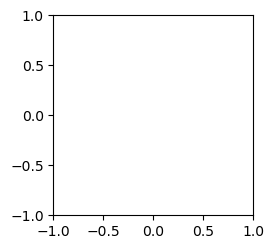

In [71]:
universe.plot(width=(2.0, 2.0))

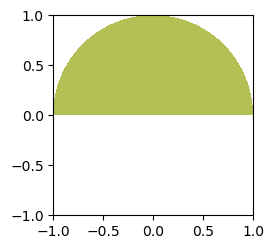

In [72]:
universe.plot(width=(2.0, 2.0), basis = 'xz')

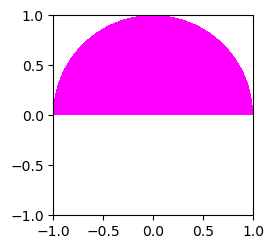

In [73]:
universe.plot(width=(2.0, 2.0), basis='xz', colors={cell: 'fuchsia'})

## Pincell Geometry

In [74]:
fuel_outer_rad = openmc.ZCylinder(r=0.39)
clad_inner_rad = openmc.ZCylinder(r=0.40)
clad_outer_rad = openmc.ZCylinder(r=0.46)

In [75]:
fuel_region = -fuel_outer_rad
gap_region = +fuel_outer_rad & -clad_inner_rad
clad_region = +clad_inner_rad & -clad_outer_rad

In [76]:
fuel = openmc.Cell(name='fuel')
fuel.fill = uo2
fuel.region = fuel_region

gap = openmc.Cell(name='air gap')
gap.region = gap_region

clad = openmc.Cell(name='clad')
clad.fill = zirconium
clad.region = clad_region

In [77]:
pitch = 1.26
left = openmc.XPlane(-pitch/2, boundary_type='reflective')
right = openmc.XPlane(pitch/2, boundary_type='reflective')
bottom = openmc.YPlane(-pitch/2, boundary_type='reflective')
top = openmc.YPlane(pitch/2, boundary_type='reflective')

In [78]:
water_region = +left & -right & +bottom & - top & + clad_outer_rad

moderator = openmc.Cell(name='moderator')
moderator.fill = water
moderator.region = water_region

In [79]:
box = openmc.rectangular_prism(width=pitch, height=pitch, boundary_type='reflective')
type(box)

openmc.region.Intersection

In [80]:
water_region = box & +clad_outer_rad

In [81]:
root_universe = openmc.Universe(cells=(fuel, gap, clad, moderator))

geometry = openmc.Geometry()
geometry.root_universe = root_universe
geometry.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell id="7" material="1" name="fuel" region="-16" universe="4" />
  <cell id="8" material="void" name="air gap" region="16 -17" universe="4" />
  <cell id="9" material="9" name="clad" region="17 -18" universe="4" />
  <cell id="10" material="10" name="moderator" region="19 -20 21 -22 18" universe="4" />
  <surface coeffs="0.0 0.0 0.39" id="16" type="z-cylinder" />
  <surface coeffs="0.0 0.0 0.4" id="17" type="z-cylinder" />
  <surface coeffs="0.0 0.0 0.46" id="18" type="z-cylinder" />
  <surface boundary="reflective" coeffs="-0.63" id="19" type="x-plane" />
  <surface boundary="reflective" coeffs="0.63" id="20" type="x-plane" />
  <surface boundary="reflective" coeffs="-0.63" id="21" type="y-plane" />
  <surface boundary="reflective" coeffs="0.63" id="22" type="y-plane" />
</geometry>


## Source definition

In [82]:
# create a point source
point = openmc.stats.Point((0,0,0))
source = openmc.Source(space=point)


In [83]:
settings = openmc.Settings()
settings.source = source
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

In [84]:
settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>eigenvalue</run_mode>
  <particles>1000</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source strength="1.0">
    <space type="point">
      <parameters>0 0 0</parameters>
    </space>
  </source>
</settings>


## tallies


In [85]:
cell_filter = openmc.CellFilter(fuel)

tally = openmc.Tally(1)
tally.filters = [cell_filter]

/home/karlflorida/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Tally instance already exists with id=1.
  warn(msg, IDWarning)


In [86]:
tally.nuclides = ['U235']
tally.scores = ['total','fission','absorption','(n,gamma)']

In [87]:
tallies = openmc.Tallies([tally])
tallies.export_to_xml()
!cat tallies.xml

<?xml version='1.0' encoding='utf-8'?>
<tallies>
  <filter id="2" type="cell">
    <bins>7</bins>
  </filter>
  <tally id="1">
    <filters>2</filters>
    <nuclides>U235</nuclides>
    <scores>total fission absorption (n,gamma)</scores>
  </tally>
</tallies>


In [88]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [89]:
!cat tallies.out

 ============================>     TALLY 1     <============================

 Cell 7
   U235
     Total Reaction Rate                  0.735496 +/- 0.00278567
     Fission Rate                         0.551656 +/- 0.00229309
     Absorption Rate                      0.662046 +/- 0.00270151
     (n,gamma)                            0.11039 +/- 0.000422238


## Plot Geometry

In [90]:
plot = openmc.Plot()
plot.filename = 'pinplot'
plot.width = (pitch,pitch)
plot.pixels = (200,200)
plot.color_by = 'material'
plot.colors = {uo2: 'yellow',water: 'blue'}

In [91]:
plots = openmc.Plots([plot])
plots.export_to_xml()
!cat plots.xml

<?xml version='1.0' encoding='utf-8'?>
<plots>
  <plot basis="xy" color_by="material" filename="pinplot" id="8" type="slice">
    <origin>0.0 0.0 0.0</origin>
    <width>1.26 1.26</width>
    <pixels>200 200</pixels>
    <color id="1" rgb="255 255 0" />
    <color id="10" rgb="0 0 255" />
  </plot>
</plots>


In [92]:
openmc.plot_geometry()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

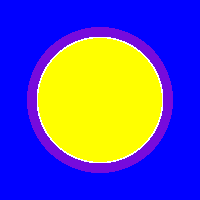

In [93]:
from IPython.display import Image
Image('pinplot.png')

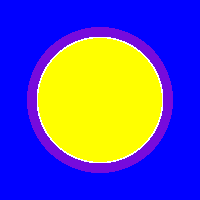

In [94]:
plot.to_ipython_image()